# Classification Problem

### Module imports and constants

In [1]:
from src.RBF import RBFNet
from src.ES import ES
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets

MARKERS = ['s', 'o', 'd', 'X', 'P', '8']
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

## First Example: Basic

### Initialization and plot

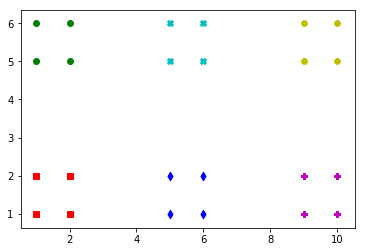

In [2]:
points = np.loadtxt('data1.txt', delimiter=',')
n = points.shape[1] - 1 #features
m = points.shape[0] # rows
X = points[:, :n]
y = points[:, n:]
for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

### ES initialization and training

In [3]:
es = ES(X=X, y=y, MU=100, LAMBDA=150, ngen=40, circles=6, problem='classification')
my_rbf = es.train()

start training
gen	nevals	avg    	std    	min    	max    
0  	100   	83.2761	8.04083	54.0589	87.8138
1  	150   	71.4219	9.89525	49.9717	87.6928
2  	150   	63.4644	12.551 	29.1514	87.5029
3  	150   	52.8834	13.0624	20.7561	87.4592
4  	150   	43.7065	13.4951	16.5884	70.8133
5  	150   	31.9565	12.5038	4.03141	70.8033
6  	150   	18.0086	9.12427	3.94425	37.4943
7  	150   	11.4302	8.79663	3.90067	37.5372
8  	150   	7.36758	5.77599	3.89099	24.8148
9  	150   	5.67335	3.4643 	3.85795	20.7241
10 	150   	4.98659	2.74471	3.85381	20.6652
11 	150   	4.20581	1.3679 	3.84901	12.3504
12 	150   	4.15718	1.54751	3.85057	16.4606
13 	150   	4.05644	1.01754	3.85046	12.3   
14 	150   	3.88441	0.0262762	3.84611	3.96625
15 	150   	4.00855	0.932742 	3.84674	12.2887
16 	150   	3.91141	0.424144 	3.84671	8.12528
17 	150   	3.86372	0.0144089	3.845  	3.90869
18 	150   	3.90071	0.42513  	3.84508	8.12867
19 	150   	3.85197	0.00684902	3.84537	3.89198
20 	150   	3.84907	0.0035498 	3.84464	3.86953
21 	150   	3.84728	0.00

### Plotting result

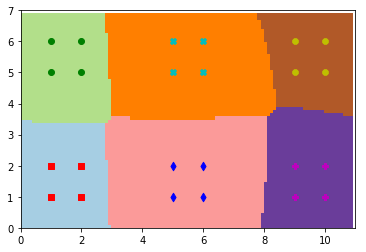

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)

for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

## Second Example

### Initialization and plot

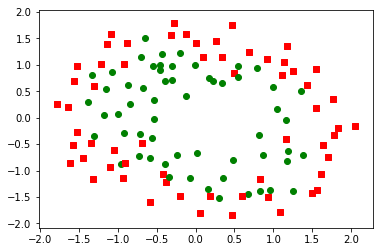

In [18]:
points = np.loadtxt('data2.txt', delimiter=',')
np.random.shuffle(points)
n = points.shape[1] - 1 #features
m = points.shape[0] # rows
X = points[:, :n]
X = preprocessing.scale(X)
y = points[:, n:]

for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

### ES initialization and training

In [19]:
es = ES(X=X, y=y, MU=100, LAMBDA=150, ngen=40, circles=6, problem='classification')
my_rbf = es.train()

start training


c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg    	std     	min  	max    
0  	100   	50.4487	0.951895	42.95	53.9592
1  	150   	49.9393	2.20523 	38.6759	50.6006
2  	150   	49.3703	3.36141 	33.5784	50.5982
3  	150   	48.5091	4.20638 	31.0061	50.5901
4  	150   	46.3889	6.32654 	25.0365	55.6699
5  	150   	41.9386	7.0712  	24.1802	52.2945
6  	150   	38.0701	8.46157 	19.1161	53.1208
7  	150   	36.16  	9.38159 	17.3639	55.6668
8  	150   	29.5604	8.42632 	16.4908	50.589 
9  	150   	26.4719	8.47311 	16.4908	47.1843
10 	150   	22.376 	5.59137 	14.7964	39.5486
11 	150   	20.095 	4.24296 	14.7901	35.2814
12 	150   	19.1751	4.60487 	13.9647	36.1463
13 	150   	17.3738	3.3281  	14.7857	32.7242
14 	150   	16.3257	1.37946 	14.7905	21.5986
15 	150   	15.8999	1.07027 	13.9557	19.9004
16 	150   	15.7124	0.918315	13.9592	20.7573
17 	150   	15.6266	0.873458	13.9565	20.7557
18 	150   	15.5929	0.707287	13.9536	18.2021
19 	150   	15.7288	0.798064	13.9527	19.0473
20 	150   	15.4669	0.612944	13.9525	17.3462
21 	150   	15.2724	0.564155	13.954 	

### Plotting result

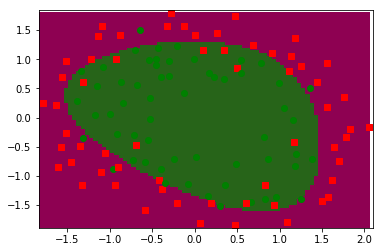

In [20]:
x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.05)
y_range = np.arange(y_min, y_max, 0.05)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('PiYG')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)

for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

### Training accuracy

In [21]:
dataset_size = X.shape[0]
correct = 0
for i in range(dataset_size): 
    actual_class = int(y[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X[i])))
    if actual_class == predicted_class:
        correct += 1
print('Training Accuracy: %{0}'.format(100 * correct / dataset_size))

Training Accuracy: %87.28813559322033


## Third Example: The Spiral Dataset

### Initialization and plot

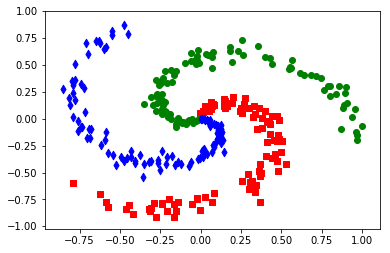

In [33]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# Plot the data
y = y.reshape(y.shape[0], 1)

for i in range(X.shape[0]):
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
    
plt.show()

### ES Initialization and training

In [26]:
es = ES(X=X, y=y, MU=100, LAMBDA=150, ngen=40, circles=8, problem='classification')
my_rbf = es.train()

start training
gen	nevals	avg    	std    	min    	max    
0  	100   	63.1788	7.42253	44.5187	69.8836
1  	150   	56.5127	8.25541	39.4448	68.9315
2  	150   	52.2396	8.0478 	37.1146	68.9463
3  	150   	47.8901	5.331  	36.7773	59.1913
4  	150   	45.1971	4.24796	35.4351	58.8767
5  	150   	42.9389	5.86597	25.6449	50.1329
6  	150   	42.9969	4.48379	29.0477	49.4377
7  	150   	41.7865	5.83083	25.3028	49.1157
8  	150   	40.9838	5.64675	22.2983	47.4292
9  	150   	35.3837	7.86951	20.9847	48.0875
10 	150   	30.0674	7.07267	14.5709	45.7323
11 	150   	26.8732	6.50678	14.5615	43.055 
12 	150   	24.6341	5.2233 	13.2343	45.0783
13 	150   	23.8173	4.6304 	14.2509	40.7236
14 	150   	22.2222	3.83673	15.2542	38.3923
15 	150   	22.0354	3.3755 	14.2511	32.0048
16 	150   	20.7462	2.7834 	14.5815	24.9953
17 	150   	21.2614	2.55541	14.5868	25.3115
18 	150   	21.1278	2.35591	14.9347	24.9783
19 	150   	20.713 	2.31421	14.9299	24.6459
20 	150   	19.5743	2.05884	14.2587	23.6469
21 	150   	19.4815	1.97651	13.9223	23.9

### Plotting result

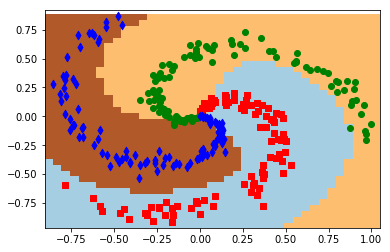

In [37]:
x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.05)
y_range = np.arange(y_min, y_max, 0.05)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)

for i in range(X.shape[0]):
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
    
plt.show()

### Training accuracy

In [38]:
dataset_size = X.shape[0]
correct = 0
for i in range(dataset_size): 
    actual_class = int(y[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X[i])))
    if actual_class == predicted_class:
        correct += 1
print('Training Accuracy: %{0}'.format(100 * correct / dataset_size))

Training Accuracy: %88.33333333333333


## Fourth Example: The Iris Dataset

### Initialization

In [39]:
X, y = datasets.load_iris(True)
m, n = X.shape
y = y.reshape(m, 1)
X = preprocessing.scale(X)

### ES initialization and training

In [40]:
es = ES(X=X, y=y, MU=100, LAMBDA=150, ngen=50, circles=5, problem='classification')
my_rbf = es.train()

start training


c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mohammad\appdata\local\programs\python\python36-32\lib\site-packages\numpy\linalg\linalg.py:1943: RuntimeWarning: overflow encountered in true_divide
  s = divide

gen	nevals	avg	std	min	max
0  	100   	nan	nan	nan	nan
1  	150   	65.984	8.27327	32.7227	68.7868
2  	150   	58.45 	15.5861	10.7377	68.7701
3  	150   	55.0676	14.0407	24.7443	68.857 
4  	150   	53.6402	15.4387	19.9622	68.822 
5  	150   	43.4698	13.2618	17.3493	68.7954
6  	150   	40.1562	13.3005	5.9921 	68.7686
7  	150   	35.121 	12.4454	10.6337	68.7204
8  	150   	26.1387	10.8783	6.49595	68.6655
9  	150   	21.1833	9.53274	7.20666	68.6499
10 	150   	17.0872	7.20225	5.83054	35.3435
11 	150   	14.1154	5.35801	5.23558	29.365 
12 	150   	12.5977	4.38752	5.92339	27.9762
13 	150   	12.05  	4.56506	5.17293	26.6227
14 	150   	10.3429	3.66015	5.1839 	23.3093
15 	150   	8.40545	2.89355	5.15935	18.581 
16 	150   	6.91196	1.52741	4.49059	13.8933
17 	150   	6.11596	0.85229	4.48891	9.18516
18 	150   	5.85169	0.629695	4.50073	7.84001
19 	150   	5.5167 	0.447138	4.49199	6.50171
20 	150   	5.32124	0.328747	4.49742	6.49945
21 	150   	5.16002	0.326358	4.48952	6.49482
22 	150   	5.08518	0.24663 	4.49178	5.823

### Training accuracy

In [41]:
dataset_size = X.shape[0]
correct = 0
for i in range(dataset_size): 
    actual_class = int(y[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X[i])))
    if actual_class == predicted_class:
        correct += 1
print('Training Accuracy: %{0}'.format(100 * correct / dataset_size))

Training Accuracy: %97.33333333333333
